### Python Fundamentals for Data Analysts
# Exercise 4.10: Customer Profiling: Age & Married Status

### Part B

**Content:**
    
1. Customer profiling based on age, income, department_id, and number of dependents <br>
2. Profiling #1: Income Level & Spending Habit <br>
3. Profiling #2: Age and Married status <br>
4. Scatterplot for average spending on customer profiles <br>
5. Compare customer profiles with regions <br>
6. Comparing customer profiles with departments <br>
7. Aggregate the max, mean, and min variables on a customer-profile level 
        for usage frequency and expenditure
    

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from datetime import datetime

In [ ]:
print('------------------------------------------------')
print('Start time: ' + datetime.now().strftime("%H:%M:%S"))
print('------------------------------------------------')

In [2]:
# Set path to access data files
path = r'C:\Users\tsoew\OneDrive\Desktop\InstaCart Basket Analysis'

In [3]:
# Import latest version of ords_prods_combined data
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ord_prod_dept.pkl'))

In [4]:
df.shape

(30964564, 37)

In [5]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,state,age,date_join,dependents,married,income,region,activity_flag,income_flag,sum_per_order
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Minnesota,81,8/1/2019,1,married,49620,Region_2,High-activity,Low income,34.9
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Minnesota,81,8/1/2019,1,married,49620,Region_2,High-activity,Low income,33.9
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Minnesota,81,8/1/2019,1,married,49620,Region_2,High-activity,Low income,78.8
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Minnesota,81,8/1/2019,1,married,49620,Region_2,High-activity,Low income,50.2
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Minnesota,81,8/1/2019,1,married,49620,Region_2,High-activity,Low income,40.9


**Security Implication:** The data now contains customer name, age and income, which are sensitive information to be shared with public. Whenever we release data to public these three columns should be hidden.

### Profiling Age and Married status

1. Young Single (< 45 year old, not married or widowed)
2. Older Single (>= 45 year old, not married or widowed)
3. Young Parents (< 45 year old, > 0 dependent)
4. Older Parents (>= 45 year old, > 0 dependent)

In [6]:
# Check column freq
df['dependents'].value_counts()

dependents
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

In [7]:
# Check column freq
df['married'].value_counts()

married
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [8]:
# Check column stat
df['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

#### Create Family Profile

In [9]:
# Use loc function to assign labels to a new column
df.loc[(df['age'] <  40) & (df['married'] != 'married'), 'profile'] = 'Young Single'
df.loc[(df['age'] >= 40) & (df['married'] != 'married'), 'profile'] = 'Older Single'
df.loc[(df['age'] <  40) & (df['dependents'] > 0) , 'profile'] = 'Young Parents'
df.loc[(df['age'] >= 40) & (df['dependents'] > 0) , 'profile']  = 'Older Parents'

In [10]:
df['profile'].value_counts()

profile
Older Parents    15220348
Young Parents     8004535
Older Single      5079106
Young Single      2660575
Name: count, dtype: int64

In [11]:
# Check income level per profile
crosstab = pd.crosstab(df['profile'], df['income_flag'], dropna = False)

In [12]:
crosstab.head()

income_flag,High income,Low income,Medium income
profile,,,
Older Parents,2819616,1778336,10622396
Older Single,972850,581253,3525003
Young Parents,78445,2578647,5347443
Young Single,23623,865065,1771887


In [13]:
# Check spending level per profile
crosstab = pd.crosstab(df['profile'], df['spend_flag'], dropna = False)

In [14]:
crosstab.head()

spend_flag,High spender,Low spender,Medium spender
profile,,,
Older Parents,4062325,1018265,10139758
Older Single,1354205,325549,3399352
Young Parents,2180378,511648,5312509
Young Single,696372,170210,1793993


### 4.c. Create Scatterplot for average spending on customer profiles

Text(0, 0.5, 'Average Spending per Order')

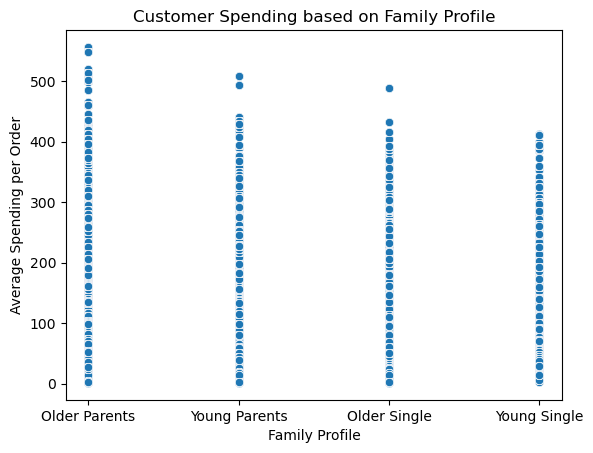

In [15]:
scatter_profile = sns.scatterplot(x = 'profile', y = 'avg_spend',data = df)
plt.title('Customer Spending based on Family Profile')
plt.xlabel('Family Profile')
plt.ylabel('Average Spending per Order')

**Note:** Older parents (age 45 and above with at least 1 dependent) tend to be the highest spenders compared to young parents or singles. 
This is understandable considering they tend to have higher income and spend extra for the dependents.

In [16]:
# Save the image into a file
scatter_profile.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatter_profile_spending.png'))

Text(0, 0.5, 'Number of customers')

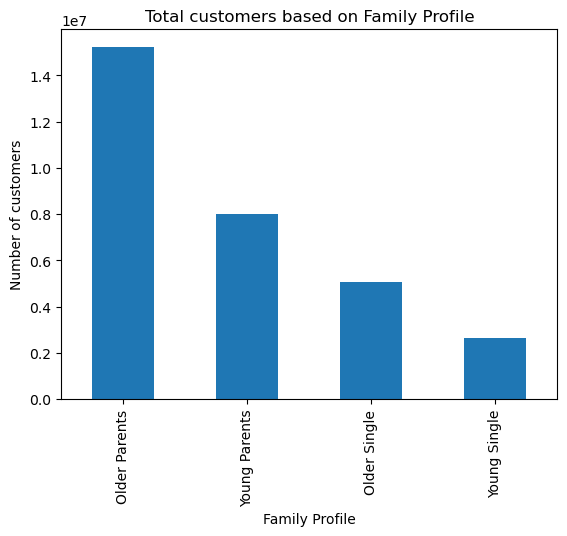

In [17]:
# Create Bar Chart for profile column
bar_profile = df['profile'].value_counts().plot.bar()
plt.title('Total customers based on Family Profile')
plt.xlabel('Family Profile')
plt.ylabel('Number of customers')

**Note:** Majority of customers consists of older parents (age above 45 with at least 1 dependent), followed by younger parents and singles

In [18]:
# Save the image into a file
bar_profile.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_cust_profile.png'))

### 4.d. Compare customer profiles with regions

In [19]:
# Comparing customer profiles with regions
crosstab = pd.crosstab(df['region'], df['profile'], dropna = False)
crosstab.head()

profile,Older Parents,Older Single,Young Parents,Young Single
region,,,,
Region_1,2708627,884321,1401576,470161
Region_2,3571459,1207053,1867238,615763
Region_3,5026561,1676331,2702645,905602
Region_4,3913701,1311401,2033076,669049


**Note:** The data shows similar pattern across regions where most customers are older parents and the least is young singles.

### 4.e. Comparing customer profiles with departments

In [20]:
# Import department.csv
df_dept = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'), index_col=False)

In [21]:
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [22]:
# Rename the first column
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [23]:
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [24]:
#Merge df with department data
df_merged = df.merge(df_dept, on = 'department_id', indicator = True)

In [25]:
df_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,dependents,married,income,region,activity_flag,income_flag,sum_per_order,profile,department,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,1,married,49620,Region_2,High-activity,Low income,34.9,Older Parents,snacks,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,married,49620,Region_2,High-activity,Low income,33.9,Older Parents,snacks,both
2,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,...,1,married,49620,Region_2,High-activity,Low income,23.5,Older Parents,snacks,both
3,11759,Organic Simply Naked Pita Chips,107,19,4.4,1986630,138,7,0,12,...,1,married,49620,Region_2,High-activity,Low income,28.9,Older Parents,snacks,both
4,13424,Almonds,45,19,4.2,3139998,138,28,6,11,...,1,married,49620,Region_2,High-activity,Low income,34.9,Older Parents,snacks,both


In [26]:
# delete df because we will not use it anymore, to release memory
del df

### We want to know what are the top ten departments in each customer profile

#### Older Parents Profile

In [27]:
# Subsetting the data with specific family profile
older_parents_profile = df_merged[df_merged['profile'] == 'Older Parents']

In [28]:
# Descriptive stats for order_hour_of_day
older_parents_profile['order_hour_of_day'].describe()

count    1.522035e+07
mean     1.341092e+01
std      4.244416e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

In [29]:
# Descriptive stats for average spending
older_parents_profile['avg_spend'].describe()

count    1.522035e+07
mean     1.219175e+02
std      5.668365e+01
min      1.300000e+00
25%      8.145596e+01
50%      1.136998e+02
75%      1.534409e+02
max      5.567208e+02
Name: avg_spend, dtype: float64

Text(0, 0.5, 'Frequency of Order')

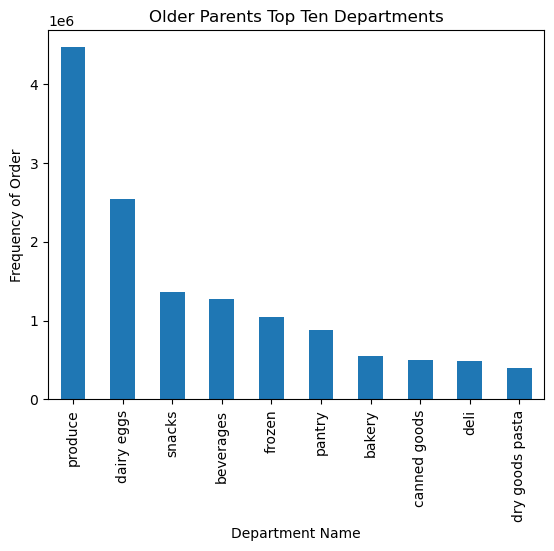

In [30]:
bar_profile_dept = older_parents_profile['department'].value_counts().head(10).plot.bar()
plt.title('Older Parents Top Ten Departments')
plt.xlabel('Department Name')
plt.ylabel('Frequency of Order')

In [31]:
# Save the image into a file
bar_profile_dept.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_profile_dept.png'))

In [32]:
del older_parents_profile

#### Young Parents Profile

In [33]:
# Subsetting the data with specific family profile
young_parents_profile = df_merged[df_merged['profile'] == 'Young Parents']

In [34]:
# Descriptive stats for order_hour_of_day
young_parents_profile['order_hour_of_day'].describe()

count    8.004535e+06
mean     1.340124e+01
std      4.250343e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

In [35]:
# Descriptive stats for avg_spend
young_parents_profile['avg_spend'].describe()

count    8.004535e+06
mean     1.232330e+02
std      5.764358e+01
min      1.000000e+00
25%      8.259559e+01
50%      1.143266e+02
75%      1.541759e+02
max      5.088000e+02
Name: avg_spend, dtype: float64

Text(0, 0.5, 'Frequency of Order')

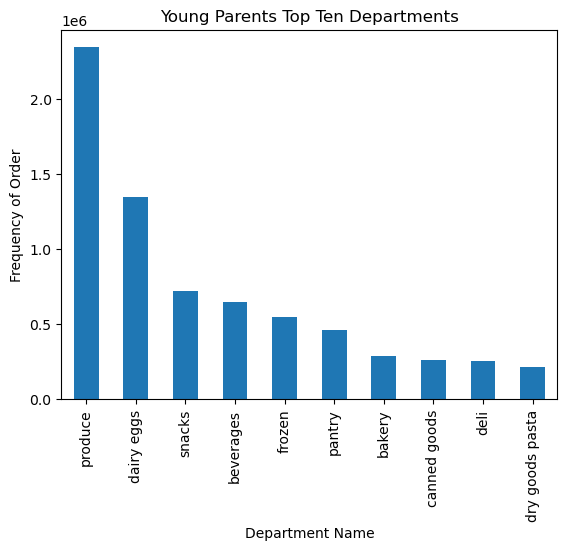

In [36]:
# Create Bar Chart for department profile
bar_young_parents = young_parents_profile['department'].value_counts().head(10).plot.bar()
plt.title('Young Parents Top Ten Departments')
plt.xlabel('Department Name')
plt.ylabel('Frequency of Order')

In [37]:
# Save the image into a file
bar_young_parents.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_young_parents.png'))

In [38]:
del young_parents_profile

#### Young Single Profile

In [39]:
# Subsetting the data with specific family profile
young_single_profile = df_merged[df_merged['profile'] == 'Young Single']

In [40]:
# Descriptive stats for order_hour_of_day
young_single_profile['order_hour_of_day'].describe()

count    2.660575e+06
mean     1.339295e+01
std      4.252361e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

In [41]:
# Descriptive stats for avg_spend
young_single_profile['avg_spend'].describe()

count    2.660575e+06
mean     1.219181e+02
std      5.642944e+01
min      2.000000e+00
25%      8.189891e+01
50%      1.135414e+02
75%      1.527292e+02
max      4.128839e+02
Name: avg_spend, dtype: float64

Text(0, 0.5, 'Frequency of Order')

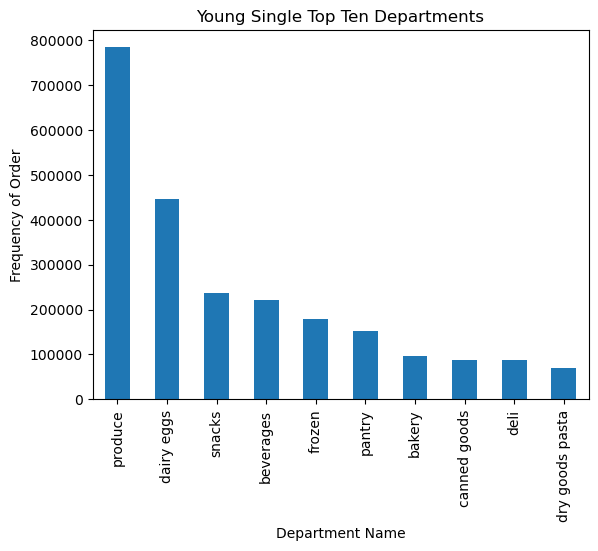

In [42]:
# Create Bar Chart for department profile
bar_young_single = young_single_profile['department'].value_counts().head(10).plot.bar()
plt.title('Young Single Top Ten Departments')
plt.xlabel('Department Name')
plt.ylabel('Frequency of Order')

In [43]:
# Save the image into a file
bar_young_single.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_young_single.png'))

In [44]:
del young_single_profile

#### Older Single Profile

In [45]:
# Subsetting the data with specific family profile
older_single_profile = df_merged[df_merged['profile'] == 'Older Single']

In [46]:
# Descriptive stats for order_hour_of_day
older_single_profile['order_hour_of_day'].describe()

count    5.079106e+06
mean     1.343597e+01
std      4.257791e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

In [47]:
# Descriptive stats for avg_spend
older_single_profile['avg_spend'].describe()

count    5.079106e+06
mean     1.217436e+02
std      5.646774e+01
min      1.000000e+00
25%      8.155176e+01
50%      1.135465e+02
75%      1.531750e+02
max      4.896009e+02
Name: avg_spend, dtype: float64

Text(0, 0.5, 'Frequency of Order')

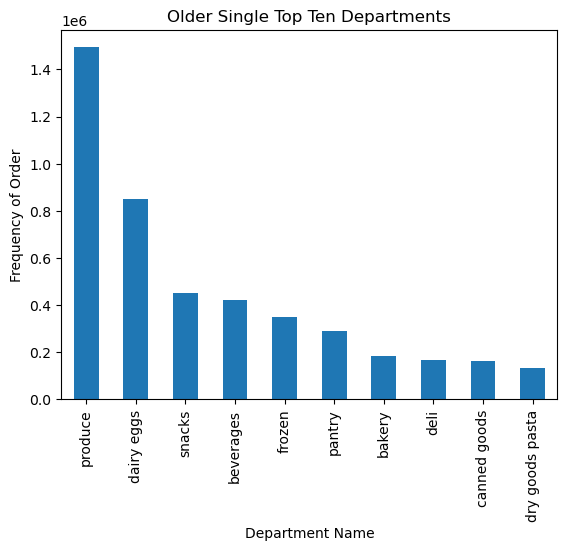

In [48]:
# Create Bar Chart for department profile
bar_older_single = older_single_profile['department'].value_counts().head(10).plot.bar()
plt.title('Older Single Top Ten Departments')
plt.xlabel('Department Name')
plt.ylabel('Frequency of Order')

**Note:** It looks like the top ten departments are very similar across four customer profiles.

In [49]:
# Save the image into a file
bar_older_single.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_older_single.png'))

In [50]:
del older_single_profile

In [52]:
#Export the dataframe
print ('Start time: ' + datetime.now().strftime("%H:%M:%S"))
df_merged.to_pickle(os.path.join(path, 'Data','Prepared Data', 'final_data.pkl'))
print ('End time: ' + datetime.now().strftime("%H:%M:%S"))

Start time: 13:22:06
End time: 13:23:26


# End